CASE STUDY: Optimizing Beverage Sales and Inventory Management Using Data Analytics

Load Packages

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

Load Dataset

In [2]:
df=pd.read_csv(r'C:\Users\User\Desktop\ml project\dataset.csv')
df.head(5)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-16131500152,12-06-2018,4988,HAPPY'S STORES,5925 UNIVERSITY AVE,Ahmedabad,50613,POINT (-92.429331 42.512766),7,Ahmedabad,...,27890,"Nutty, smooth, and richly almond-flavored",12,750,18.0,27.0,1,27.0,0.75,0.19
1,INV-16062000032,12-04-2018,2622,HY-VEE FOOD STORE / IOWA CITY,1125 N DODGE ST,Bangalore,52240,POINT (-91.518868 41.676095),52,Bangalore,...,27890,"Nutty, smooth, and richly almond-flavored",12,750,18.0,27.0,3,81.0,2.25,0.59
2,INV-15962400282,11/29/2018,4988,HAPPY'S STORES,5925 UNIVERSITY AVE,Mumbai,50613,POINT (-92.429331 42.512766),7,Mumbai,...,27890,"Nutty, smooth, and richly almond-flavored",12,750,18.0,27.0,1,27.0,0.75,0.19
3,INV-16226300035,12-11-2018,2545,HY-VEE / IOWA CITY,310 N 1ST ST,Chennai,52245,POINT (-91.528105 42.207428),52,Chennai,...,27890,"Nutty, smooth, and richly almond-flavored",12,750,18.0,27.0,2,54.0,1.50,0.39
4,INV-16296600079,12/13/2018,2582,HY-VEE #2 FOOD STORE / MASON CITY,551 S ILLINOIS AVE,Kolkata,50401,POINT (-93.17114 43.14623),17,Delhi,...,27890,"Nutty, smooth, and richly almond-flavored",12,750,18.0,27.0,1,27.0,0.75,0.19


Exploratory Data Analysis (EDA)

In [3]:
# Finding missing values
df.isnull().sum()

Invoice/Item Number          0
Date                         0
Store Number                 0
Store Name                   0
Address                   5246
City                         0
Zip Code                     0
Store Location           97272
County Number                0
County                       0
Category                  3710
Category Name             3710
Vendor Number                3
Vendor Name                  1
Item Number                  0
Item Description            21
Pack                         0
Bottle Volume (ml)           0
State Bottle Cost            0
State Bottle Retail          0
Bottles Sold                 0
Sale (Dollars)               0
Volume Sold (Liters)         0
Volume Sold (Gallons)        0
dtype: int64

In [4]:
df['Store Location'].fillna("Unknown", inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_18088\523940604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Store Location'].fillna("Unknown", inplace=True)


In [5]:

df.fillna({
    'Address': "Unknown",
    'Category': df['Category'].mode()[0],
    'Category Name': df['Category Name'].mode()[0],
    'Vendor Number': df['Vendor Number'].mode()[0],
    'Vendor Name': df['Vendor Name'].mode()[0],
    'Item Description': "No Description"
}, inplace=True)

# Verify missing values 
print(df.isnull().sum())


Invoice/Item Number      0
Date                     0
Store Number             0
Store Name               0
Address                  0
City                     0
Zip Code                 0
Store Location           0
County Number            0
County                   0
Category                 0
Category Name            0
Vendor Number            0
Vendor Name              0
Item Number              0
Item Description         0
Pack                     0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64


In [6]:
# Checking datatype
df.dtypes

Invoice/Item Number       object
Date                      object
Store Number               int64
Store Name                object
Address                   object
City                      object
Zip Code                   int64
Store Location            object
County Number              int64
County                    object
Category                 float64
Category Name             object
Vendor Number            float64
Vendor Name               object
Item Number                int64
Item Description          object
Pack                       int64
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [7]:
#Assigning correct Datatype
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')


C:\Users\User\AppData\Local\Temp\ipykernel_18088\2420334487.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')


In [8]:
# Extract year, month, and day
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [9]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Month,Day
0,INV-16131500152,2018-12-06,4988,HAPPY'S STORES,5925 UNIVERSITY AVE,Ahmedabad,50613,POINT (-92.429331 42.512766),7,Ahmedabad,...,750,18.0,27.0,1,27.0,0.75,0.19,2018.0,12.0,6.0
1,INV-16062000032,2018-12-04,2622,HY-VEE FOOD STORE / IOWA CITY,1125 N DODGE ST,Bangalore,52240,POINT (-91.518868 41.676095),52,Bangalore,...,750,18.0,27.0,3,81.0,2.25,0.59,2018.0,12.0,4.0
2,INV-15962400282,NaT,4988,HAPPY'S STORES,5925 UNIVERSITY AVE,Mumbai,50613,POINT (-92.429331 42.512766),7,Mumbai,...,750,18.0,27.0,1,27.0,0.75,0.19,NaN,NaN,NaN
3,INV-16226300035,2018-12-11,2545,HY-VEE / IOWA CITY,310 N 1ST ST,Chennai,52245,POINT (-91.528105 42.207428),52,Chennai,...,750,18.0,27.0,2,54.0,1.50,0.39,2018.0,12.0,11.0
4,INV-16296600079,NaT,2582,HY-VEE #2 FOOD STORE / MASON CITY,551 S ILLINOIS AVE,Kolkata,50401,POINT (-93.17114 43.14623),17,Delhi,...,750,18.0,27.0,1,27.0,0.75,0.19,NaN,NaN,NaN


1.Understanding customer preferences across different store locations. 

C:\Users\User\AppData\Local\Temp\ipykernel_18088\3835378905.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette="Blues_r")


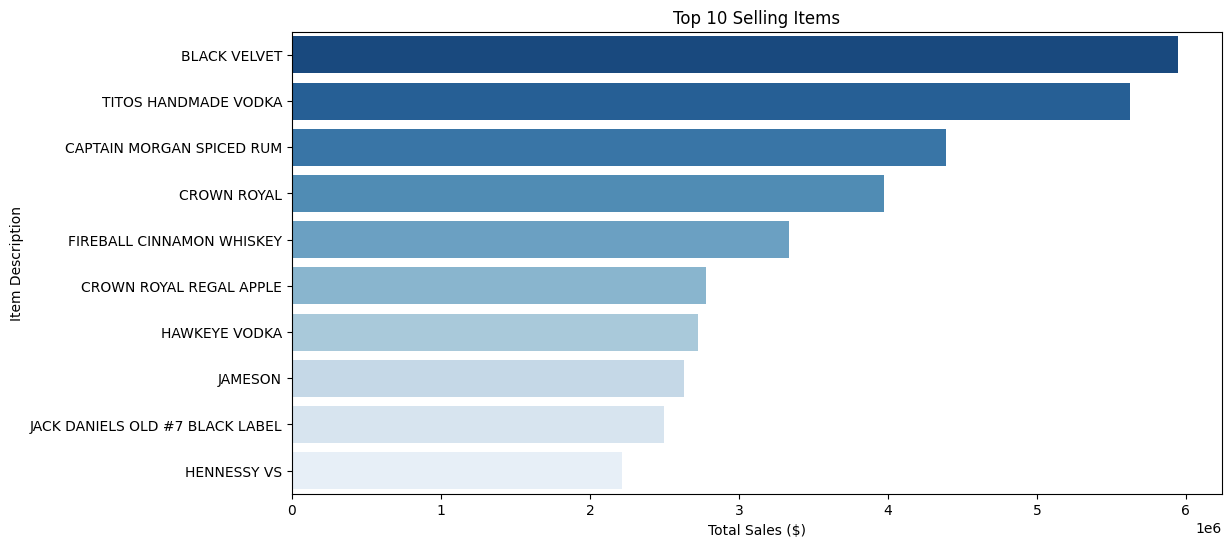

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 selling items
top_items = df.groupby("Item Description")["Sale (Dollars)"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_items.values, y=top_items.index, palette="Blues_r")
plt.xlabel("Total Sales ($)")
plt.ylabel("Item Description")
plt.title("Top 10 Selling Items")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_18088\1047428994.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values,y=category_sales.index, palette="coolwarm")


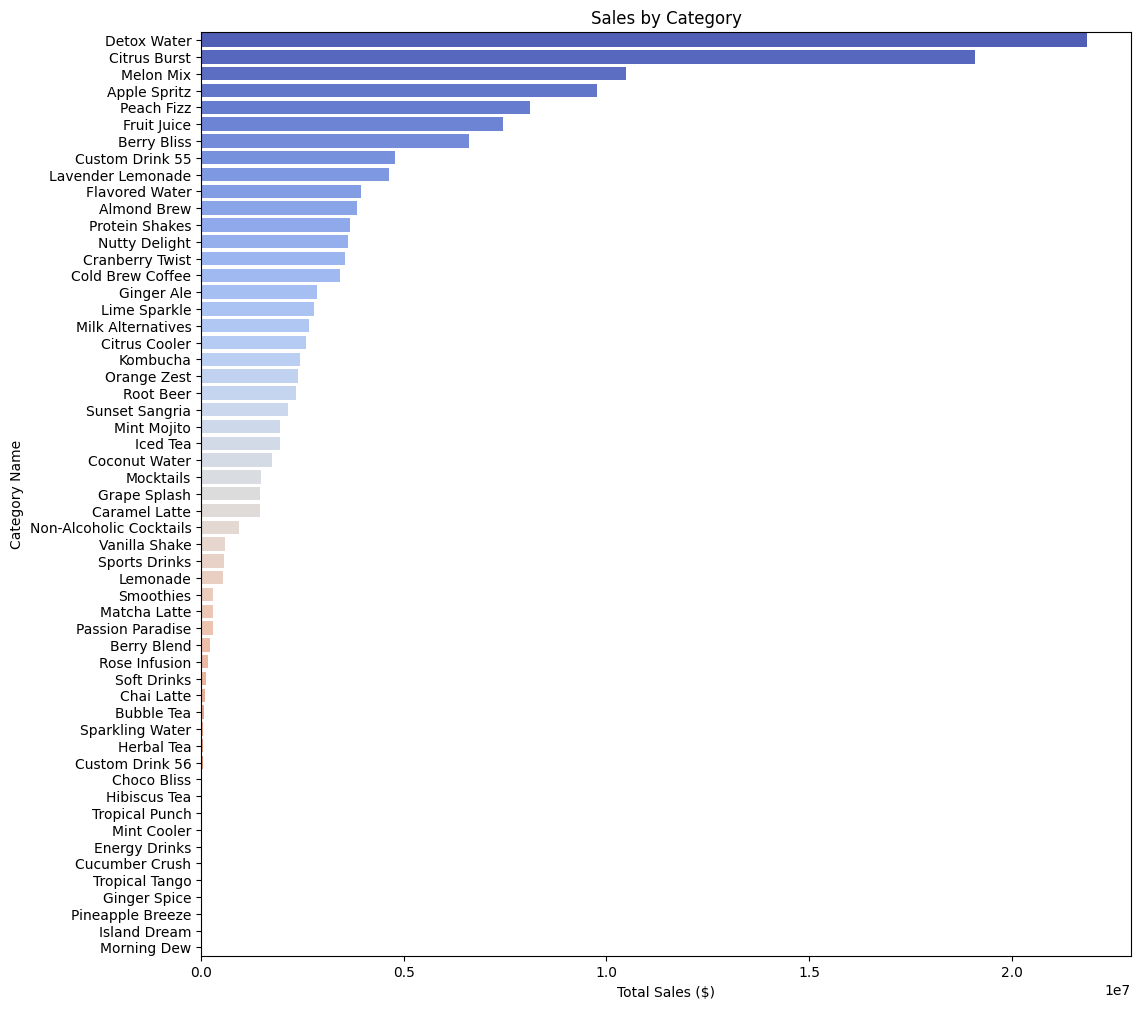

In [11]:
# Sales by category
category_sales = df.groupby("Category Name")["Sale (Dollars)"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 12))
sns.barplot(x=category_sales.values,y=category_sales.index, palette="coolwarm")
plt.xlabel("Total Sales ($)")
plt.ylabel("Category Name")
plt.title("Sales by Category")
plt.show()

2] Optimizing inventory levels to reduce overstocking and stockouts. 

In [12]:

# Calculate average sales per product
inventory_levels = df.groupby("Item Description")[["Bottles Sold", "Volume Sold (Liters)"]].mean()
inventory_levels

,Bottles Sold,Volume Sold (Liters)
Item Description,,
"Creamy, rich, and classic vanilla shake",12.666667,8.500000
"Pure, refreshing, and naturally hydrating",1.000000,0.750000
"Rich, nourishing, and packed with protein.",4.000000,3.000000
ABSOLUT ELECTRIK,30.039604,22.529703
ABSOLUT W/FEVER TREE GINGER BEER,7.781250,5.835938
...,...,...
ZUBROWKA BISON GRASS VODKA,9.000000,6.750000
ZWACK,6.000000,4.500000
ZYR VODKA,24.000000,18.000000


In [13]:
# Identify overstocked or understocked items
overstocked = inventory_levels[inventory_levels["Bottles Sold"] > inventory_levels["Bottles Sold"].quantile(0.90)]


print("Overstocked Items:")
print(overstocked)



Overstocked Items:
                                            Bottles Sold  Volume Sold (Liters)
Item Description                                                              
ABSOLUT ELECTRIK                               30.039604             22.529703
ANNIE'S APPLE PIE                             240.000000             90.000000
AVION ESPRESSO                                 24.000000             18.000000
BAILEYS STRAWBERRIES & CREAM                   17.879245             13.409434
BALVENIE TRIO PACK 50ML                        64.000000              9.600000
...                                                  ...                   ...
WISCONSIN CLUB VODKA                           35.044776             59.940299
WOODFORD RESERVE PERSONAL SELECTION BARREL    180.000000            180.000000
WOODFORD RESERVE STRAIGHT BOURBON              17.347826             30.358696
YUKON JACK WICKED HOT                          36.000000             27.000000
ZYR VODKA                        

In [14]:
understocked = inventory_levels[inventory_levels["Bottles Sold"] < inventory_levels["Bottles Sold"].quantile(0.10)]
print("Understocked Items:")
print(understocked)

Understocked Items:
                                            Bottles Sold  Volume Sold (Liters)
Item Description                                                              
 Pure, refreshing, and naturally hydrating      1.000000              0.750000
ARDBEG 10YR QUADRANT & 50ML UIGEADAIL           2.000000              1.600000
BAILEY'S ORIGINAL IRISH CREAM MINIS             1.000000              1.000000
BAILEYS ORIGINAL IRISH CREAM MINI               1.644681              1.644681
BAILEYS PUMPKIN SPICE IRISH CREAM               2.000000              1.500000
...                                                  ...                   ...
YAHARA BAY BARRELL MELLOWED GIN                 1.000000              1.000000
YB BOURBON 100ML                                2.000000              1.200000
YB BOURBON 200ML                                1.000000              1.200000
YB BOURBON 375ML PILAR                          1.000000              2.250000
YB BOURBON 750ML FENICE         

3] Analyzing pricing strategies and their impact on revenue. 

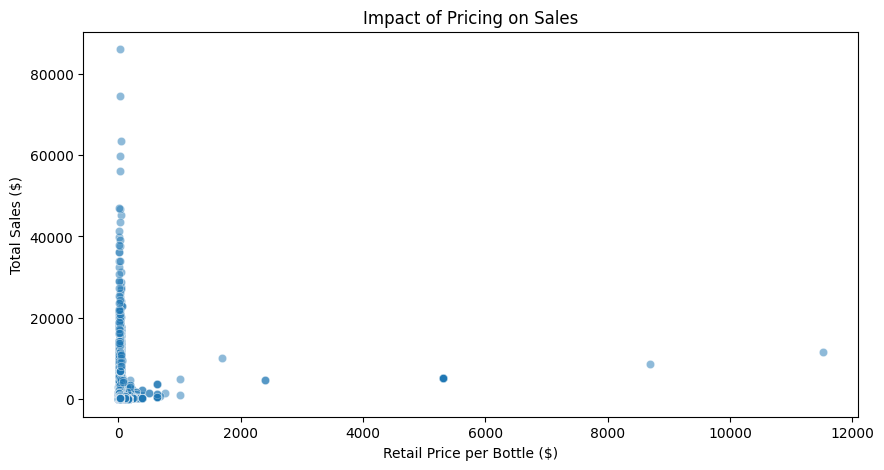

In [15]:

# Relationship between price and sales
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["State Bottle Retail"], y=df["Sale (Dollars)"], alpha=0.5)
plt.xlabel("Retail Price per Bottle ($)")
plt.ylabel("Total Sales ($)")
plt.title("Impact of Pricing on Sales")
plt.show()

4] Identifying seasonal trends to adjust supply and marketing strategies accordingly. 

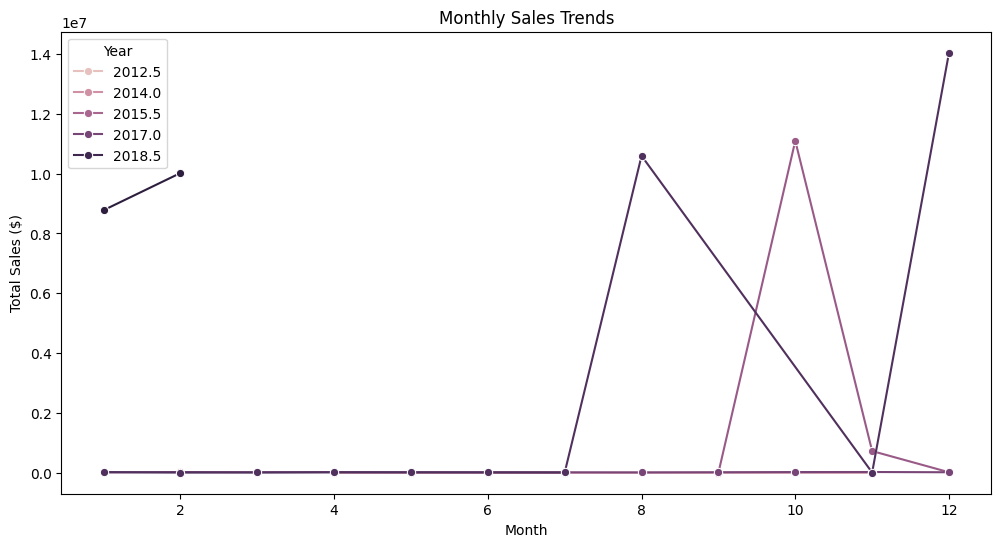

In [16]:

# Monthly sales trend
monthly_sales = df.groupby(["Year", "Month"])["Sale (Dollars)"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="Month", y="Sale (Dollars)", hue="Year", marker="o")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.title("Monthly Sales Trends")
plt.show()

5] Reducing operational inefficiencies and waste in distribution and storage.

C:\Users\User\AppData\Local\Temp\ipykernel_18088\1778906854.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_performance.values[:10], y=store_performance.index[:10], palette="Purples_r")


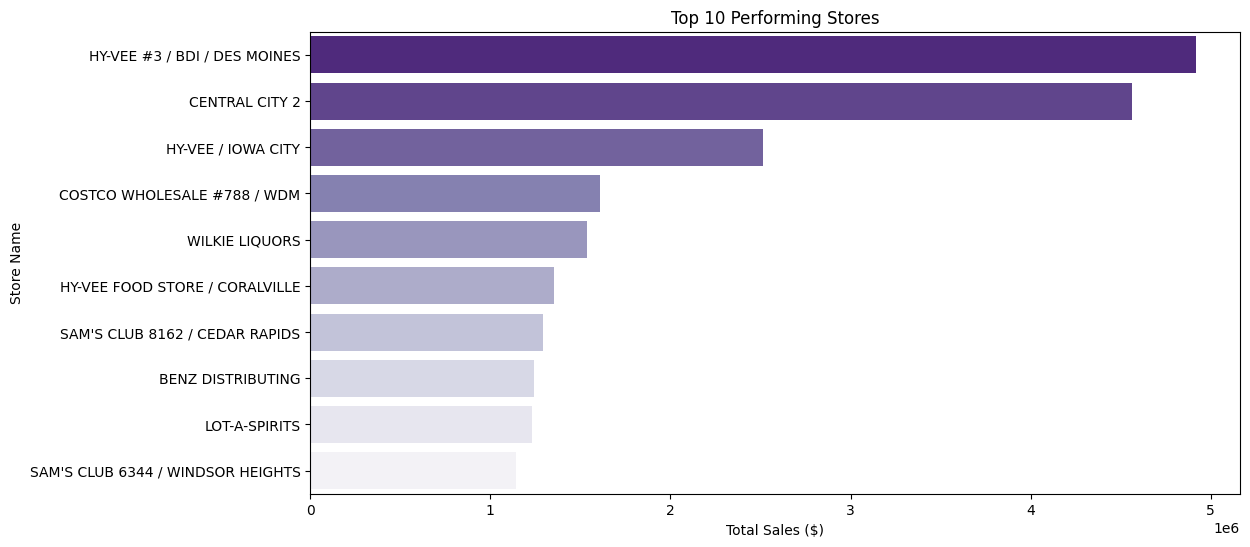

In [17]:



# Store performance
store_performance = df.groupby("Store Name")["Sale (Dollars)"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=store_performance.values[:10], y=store_performance.index[:10], palette="Purples_r")
plt.xlabel("Total Sales ($)")
plt.ylabel("Store Name")
plt.title("Top 10 Performing Stores")
plt.show()

  Predictive Sales Forecasting Model using prophet model

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
22:42:29 - cmdstanpy - INFO - Chain [1] start processing
22:42:30 - cmdstanpy - INFO - Chain [1] done processing


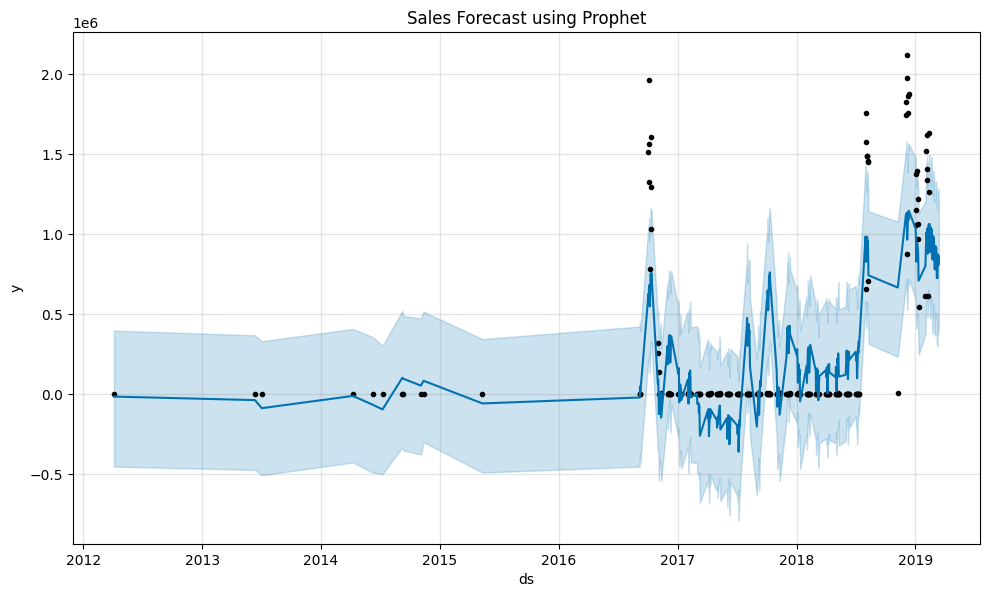

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA





# Aggregate sales per date
daily_sales = df.groupby("Date")["Sale (Dollars)"].sum().reset_index()


prophet_df = daily_sales.rename(columns={"Date": "ds", "Sale (Dollars)": "y"})
prophet_model = Prophet()
prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(periods=30)
forecast_prophet = prophet_model.predict(future)

# Prophet Forecast
prophet_model.plot(forecast_prophet)
plt.title("Sales Forecast using Prophet")
plt.show()


ARIMA Model for Forecasting

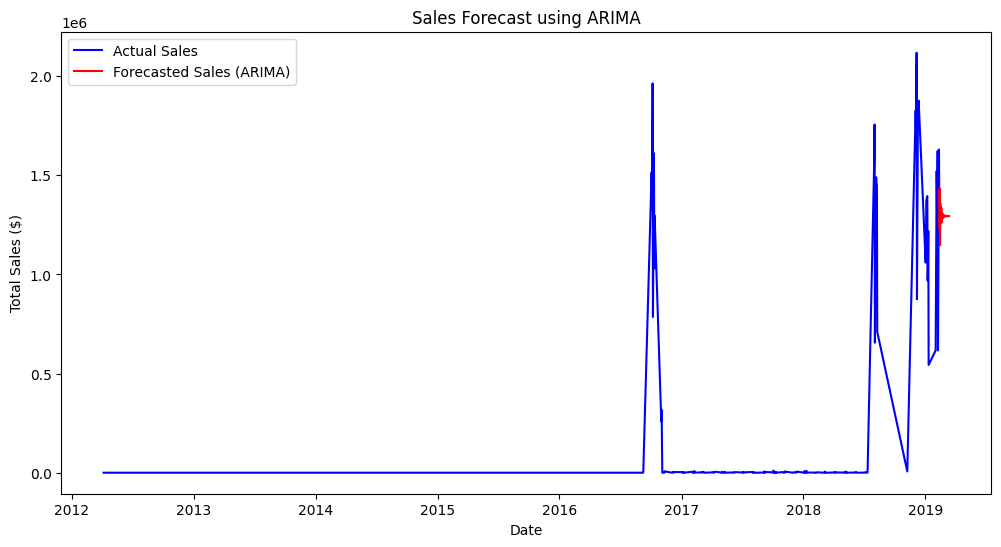

In [ ]:


arima_model = ARIMA(daily_sales["Sale (Dollars)"], order=(5,1,0))  # (p,d,q) values can be tuned
arima_fit = arima_model.fit()

# Forecast for next 30 days
forecast_arima = arima_fit.forecast(steps=30)


plt.figure(figsize=(12, 6))
plt.plot(daily_sales["Date"], daily_sales["Sale (Dollars)"], label="Actual Sales", color="blue")
plt.plot(pd.date_range(daily_sales["Date"].max(), periods=30, freq="D"), forecast_arima, label="Forecasted Sales (ARIMA)", color="red")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.title("Sales Forecast using ARIMA")
plt.legend()
plt.show()




In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selecting relevant features
features = ["State Bottle Cost", "State Bottle Retail", "Bottles Sold", "Volume Sold (Liters)"]
target = "Sale (Dollars)"

# Drop rows with missing values in selected columns
df_clean = df.dropna(subset=features + [target])

# Splitting data into training and testing sets
X = df_clean[features]
y = df_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Inventory Prediction Model Performance:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")



Random Forest Inventory Prediction Model Performance:
Mean Absolute Error: 3.1382737997201846
Mean Squared Error: 2032.7459799832004
R-squared Score: 0.9922095305623996


In [22]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.7608222470398226

Business Strategy Recommendations

1 Adjust stock levels based on demand

In [ ]:

high_demand_items = df.groupby("Item Description")["Bottles Sold"].sum().sort_values(ascending=False).head(10)
print("High Demand Items (Consider increasing stock):")
print(high_demand_items)





High Demand Items (Consider increasing stock):
Item Description
BLACK VELVET                 550255
FIREBALL CINNAMON            546049
HAWKEYE VODKA                403016
TITOS HANDMADE VODKA         299066
CAPTAIN MORGAN SPICED RUM    246185
FIREBALL CINNAMON WHISKEY    233635
FIVE O'CLOCK VODKA           212704
MCCORMICK VODKA PET          205979
CROWN ROYAL                  165896
BARTON VODKA                 165131
Name: Bottles Sold, dtype: int64


In [42]:
low_demand_items = df.groupby("Item Description")["Bottles Sold"].sum().sort_values().head(10)
print("Low Demand Items (Consider reducing stock or discounts):")
print(low_demand_items)

Low Demand Items (Consider reducing stock or discounts):
Item Description
YAHARA BAY BARRELL MELLOWED GIN                              1
SEAGRAMS EXTRA SMOOTH VODKA 1.75L W/JUICY WATERMELON 50ML    1
EVAN WILLIAMS RESERVE COMBO PACK                             1
SMIRNOFFF SOURCED RUBY RED GRAPEFRUIT                        1
GENTLEMAN JACK W/ COASTER SET                                1
SMIRNOFF MOSCOW MULE MINI                                    1
SIPP'N -N- MIX'N                                             1
SILVER CREEK CHESTNUT LIQUEUR                                1
GODIVA CHOCOLATE LIQUEUR MINI                                1
CROWN ROYAL W/TAILGATE KANSAS CITY CHIEFS FLASK              1
Name: Bottles Sold, dtype: int64


2]  Optimize pricing strategies

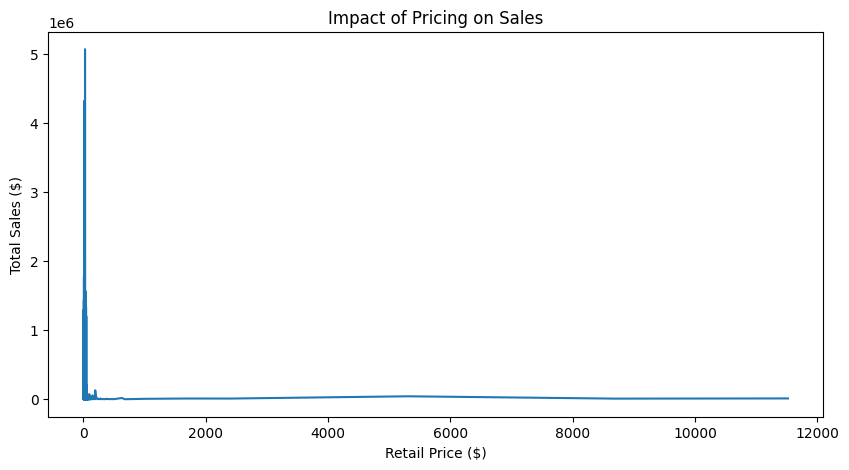

In [43]:

price_sensitivity = df.groupby("State Bottle Retail")["Sale (Dollars)"].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=price_sensitivity.index, y=price_sensitivity.values)
plt.xlabel("Retail Price ($)")
plt.ylabel("Total Sales ($)")
plt.title("Impact of Pricing on Sales")
plt.show()



3] Seasonal promotions

In [44]:
 
peak_season = df.groupby(["Year", "Month"])["Sale (Dollars)"].sum().idxmax()
print(f"Peak Sales Season: {peak_season} (Consider running promotions and stock adjustments)")



Peak Sales Season: (np.float64(2018.0), np.float64(12.0)) (Consider running promotions and stock adjustments)


4] Store-level strategy

In [46]:

top_stores = df.groupby("Store Name")["Sale (Dollars)"].sum().sort_values(ascending=False).head(10)
print("Top Performing Stores (Consider expanding product range and promotions):")
print(top_stores)



Top Performing Stores (Consider expanding product range and promotions):
Store Name
HY-VEE #3 / BDI / DES MOINES         4917313.93
CENTRAL CITY 2                       4561616.66
HY-VEE / IOWA CITY                   2513863.64
COSTCO WHOLESALE #788 / WDM          1607452.66
WILKIE LIQUORS                       1539329.51
HY-VEE FOOD STORE / CORALVILLE       1353251.56
SAM'S CLUB 8162 / CEDAR RAPIDS       1292605.26
BENZ DISTRIBUTING                    1240995.22
LOT-A-SPIRITS                        1231958.75
SAM'S CLUB 6344 / WINDSOR HEIGHTS    1140140.03
Name: Sale (Dollars), dtype: float64


In [47]:
underperforming_stores = df.groupby("Store Name")["Sale (Dollars)"].sum().sort_values().head(10)
print("Underperforming Stores (Consider reducing inventory or targeted marketing):")
print(underperforming_stores)

print("\n✅ Business Strategy Recommendations Generated! 🚀")

Underperforming Stores (Consider reducing inventory or targeted marketing):
Store Name
MADAME MARY                      0.00
HY-VEE #7                        0.00
KUM & GO #1202                   0.00
KUM & GO #1097                   5.09
CLINTON GAS & MART              18.00
HOMETOWN FOODS- CONRAD          28.53
DASH EVENTS LLC                 31.14
DAHL'S / BEAVER                 60.60
HY-VEE FOOD STORE / DOUGLAS    225.00
THOME ENTERPRISES LLC          288.00
Name: Sale (Dollars), dtype: float64

✅ Business Strategy Recommendations Generated! 🚀
